In [1]:
!pip install opencv-python pytesseract matplotlib


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Detected License Plate Number: MHIZDE 14331


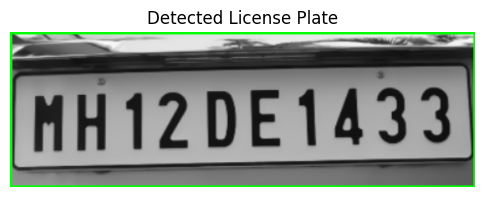

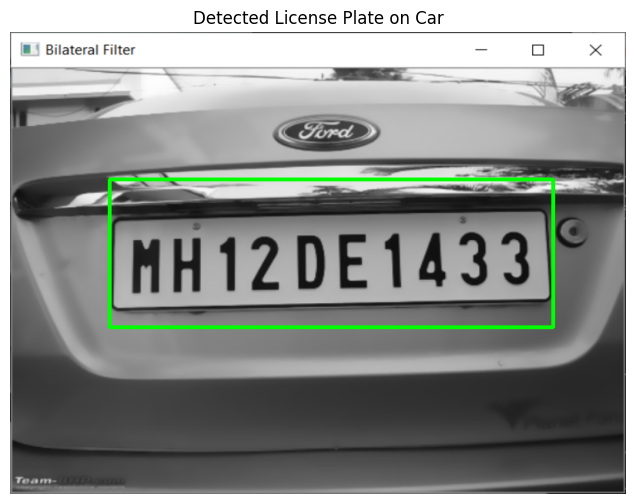

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt


# Load image
image_path = "car.png"  
img = cv2.imread(image_path)
img = cv2.resize(img, (800, 600))

# Load Haar Cascade for license plate detection
plate_cascade = cv2.CascadeClassifier("model/haarcascade_russian_plate_number.xml")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 20))

# Draw rectangle & extract plate
for (x, y, w, h) in plates:
    plate_img = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 3)
    
    # Convert plate to grayscale & apply threshold
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    _, plate_thresh = cv2.threshold(plate_gray, 100, 255, cv2.THRESH_BINARY)
    
    # Use Tesseract OCR to extract text
    text = pytesseract.image_to_string(plate_thresh, config='--psm 8')
    print("Detected License Plate Number:", text.strip())
    
    # Show extracted region
    plt.figure(figsize=(6,3))
    plt.title("Detected License Plate")
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Show final result
plt.figure(figsize=(10,6))
plt.title("Detected License Plate on Car")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
